In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools
import seaborn as sns
from tqdm.notebook import tqdm

In [401]:
df = pd.read_csv("./results.csv")
df = df.sort_values(["instance","solver"])

df = df.drop("Unnamed: 0", axis=1)
for col in ["solver","instance"]:
    df = df[[col] + [v for v in df.columns if v != col]]


In [402]:
display(df.head(5))
display(df["solver"].unique())
display(df["instance"].unique())

,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
49,BiObjBBOB1,MOLE,0.0,2733.0,422.539806,0.435575,2.161855,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,105.634951,4.016938e+05,2.112699e+04,414.062848,2.205512e+07,2.112699e+04,NaN
78,BiObjBBOB1,NSGA-II,0.0,2733.0,978.269291,1.008449,1.982477,455.888163,4.509834e+07,8.300774e+07,464.671710,4.588747e+07,8.358580e+07,244.567323,2.464981e+07,9.710786e+07,610.186273,6.057618e+07,9.759838e+07,NaN
93,BiObjBBOB1,SMS-EMOA,0.0,2733.0,984.034648,1.014392,2.468993,475.795989,4.563235e+07,8.338847e+07,493.210290,4.751933e+07,8.475113e+07,246.008662,2.606331e+07,9.692151e+07,591.754737,5.856264e+07,9.708670e+07,NaN
116,BiObjBBOB1,omnioptimizer,0.0,2733.0,7963.289993,8.208958,1.983432,5905.671150,5.864980e+08,7.775372e+08,5911.426964,5.870584e+08,7.777188e+08,1990.822498,2.178632e+08,7.949364e+08,7952.157326,7.933756e+08,7.950906e+08,NaN
55,BiObjBBOB2,MOLE,0.0,2733.0,0.000000,0.000000,1.000510,0.000000,1.472149e+06,0.000000e+00,186.482767,1.141996e+07,0.000000e+00,0.000000,2.288574e+06,7.779380e+06,684.289561,2.507791e+07,6.427810e+07,NaN


array(['MOLE', 'NSGA-II', 'SMS-EMOA', 'omnioptimizer'], dtype=object)

array(['BiObjBBOB1', 'BiObjBBOB2', 'BiObjBBOB3', 'BiObjBBOB4',
       'BiObjBBOB5', 'DTLZ1', 'DTLZ2', 'DTLZ3', 'DTLZ4', 'DTLZ5', 'DTLZ6',
       'DTLZ7', 'MMF1', 'MMF10', 'MMF11', 'MMF12', 'MMF14', 'MMF14a',
       'MMF15', 'MMF15a', 'MMF1e', 'MMF1z', 'MMF2', 'MMF3', 'MMF4',
       'MMF5', 'MMF6', 'MMF7', 'MMF8', 'MMF9', 'ZDT1', 'ZDT2', 'ZDT3',
       'ZDT4', 'ZDT6'], dtype=object)

In [403]:
df[df["solver"] == "omnioptimizer"]

,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
116,BiObjBBOB1,omnioptimizer,0.0,2733.0,7963.289993,8.208958,1.983432,5905.671150,5.864980e+08,7.775372e+08,5911.426964,5.870584e+08,7.777188e+08,1990.822498,2.178632e+08,7.949364e+08,7952.157326,7.933756e+08,7.950906e+08,NaN
10,BiObjBBOB2,omnioptimizer,0.0,2733.0,10698.060749,8.027908,3.770160,10210.348845,1.018380e+09,9.905457e+08,10249.388489,1.022040e+09,9.922375e+08,2674.515187,3.776760e+08,1.069210e+09,10605.312977,1.059440e+09,1.071916e+09,NaN
119,BiObjBBOB3,omnioptimizer,0.0,2733.0,1517.082090,15.751420,3.129886,1418.617909,1.417097e+08,1.329586e+08,1434.431852,1.432270e+08,1.331036e+08,379.270522,3.836991e+07,1.516110e+08,1123.021962,1.119982e+08,1.536454e+08,NaN
126,BiObjBBOB4,omnioptimizer,0.0,2733.0,0.000000,0.000000,4.625419,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
19,BiObjBBOB5,omnioptimizer,0.0,2733.0,55.729139,0.142080,2.293290,23.911418,2.409780e+06,3.986613e+06,44.893228,4.484201e+06,4.396201e+06,13.932285,1.420325e+06,5.600560e+06,52.727853,5.267002e+06,6.567601e+06,NaN
30,DTLZ1,omnioptimizer,0.0,2733.0,115.503670,0.955975,1.499987,28.875918,2.945754e+06,1.153775e+07,114.754832,1.146389e+07,1.155847e+07,28.875918,2.959904e+06,1.153775e+07,116.277963,1.161597e+07,1.155847e+07,NaN
71,DTLZ2,omnioptimizer,0.0,2733.0,115.929246,0.964359,1.505423,28.969796,2.894908e+06,1.157963e+07,30.176048,3.014478e+06,1.205791e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
70,DTLZ3,omnioptimizer,0.0,2733.0,115.500337,0.963398,1.499987,28.875084,2.989170e+06,1.153830e+07,114.810723,1.146946e+07,1.155791e+07,28.875084,3.011759e+06,1.153830e+07,116.451956,1.163328e+07,1.155791e+07,NaN
99,DTLZ4,omnioptimizer,0.0,2733.0,115.871080,0.964148,1.486987,28.918473,2.890127e+06,1.156051e+07,30.223449,3.019313e+06,1.207725e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
73,DTLZ5,omnioptimizer,0.0,2733.0,115.929246,0.964359,1.505423,28.969796,2.894908e+06,1.157963e+07,30.176048,3.014478e+06,1.205791e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN


In [404]:
df.groupby(["solver","instance"]).size().unstack("solver")

solver,MOLE,NSGA-II,SMS-EMOA,omnioptimizer
instance,,,,
BiObjBBOB1,1.0,1.0,1.0,1.0
BiObjBBOB2,1.0,1.0,1.0,1.0
BiObjBBOB3,1.0,1.0,1.0,1.0
BiObjBBOB4,1.0,1.0,1.0,1.0
BiObjBBOB5,1.0,1.0,1.0,1.0
DTLZ1,1.0,1.0,1.0,1.0
DTLZ2,1.0,1.0,1.0,1.0
DTLZ3,1.0,1.0,1.0,1.0
DTLZ4,NaN,1.0,1.0,1.0


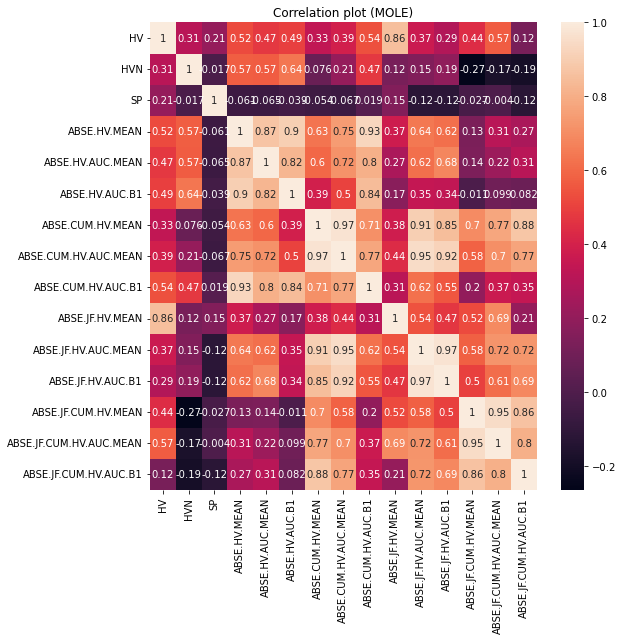

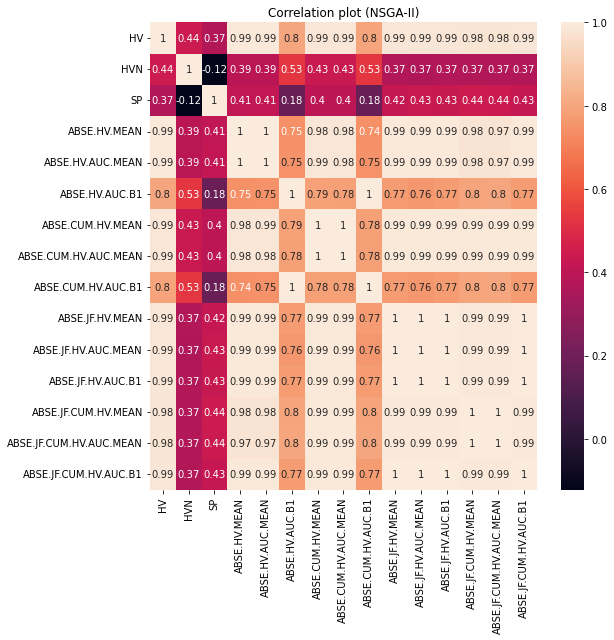

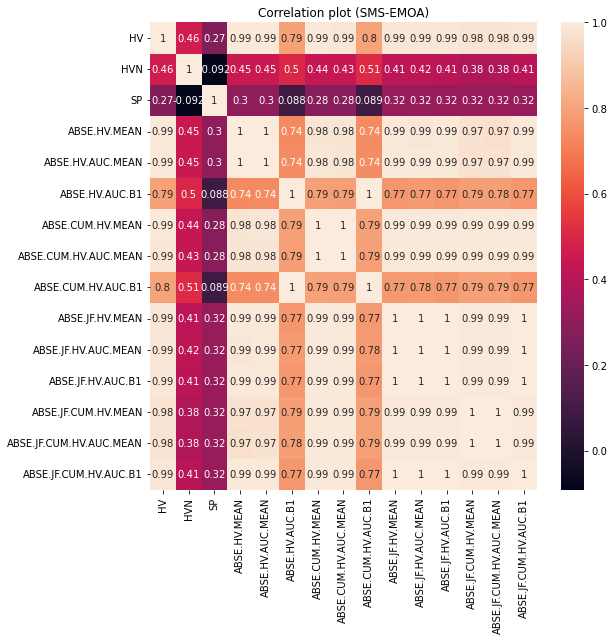

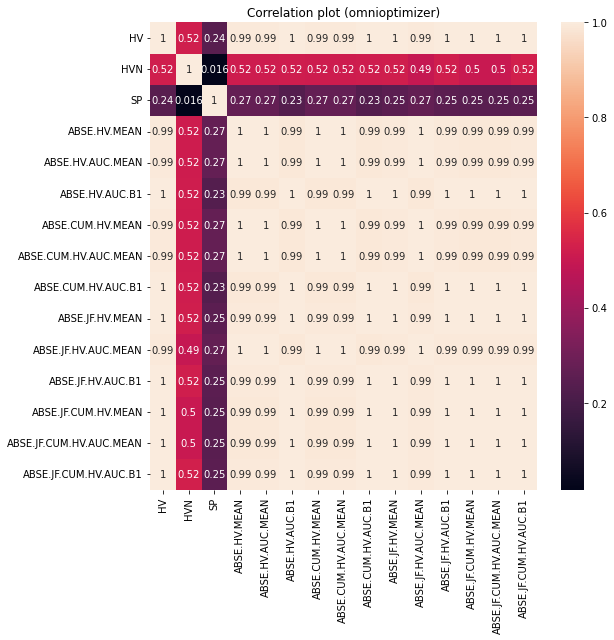

In [405]:
for solver, gdf in df.groupby("solver"):
    metrics = gdf.columns[~gdf.columns.isin(["run", "seed", "Unnamed: 0", "solver", "instance", "configuration"])]
    fig, ax = plt.subplots(1, figsize=(9,9))
    ax.set_aspect('auto')
    sns.heatmap(gdf[metrics].corr(), annot = True)
    ax.set_title(f"Correlation plot ({solver})")
    plt.tight_layout()
    plt.savefig(f"figures/correlations_{solver}.pdf")

In [406]:
for solver, gdf in df.groupby("solver"):
    gdf = gdf[gdf["HV"] == 0]
    if len(gdf) == 0:
        continue
    print(solver)
    display(gdf)

MOLE


,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
55,BiObjBBOB2,MOLE,0.0,2733.0,0.0,0.0,1.000510,0.0,1.472149e+06,0.000000,186.482767,1.141996e+07,0.000000,0.0,2.288574e+06,7.779380e+06,684.289561,2.507791e+07,6.427810e+07,NaN
16,BiObjBBOB5,MOLE,0.0,2733.0,0.0,0.0,1.033338,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.863782e+05,0.000000e+00,59.094478,5.119619e+06,0.000000e+00,NaN
137,DTLZ7,MOLE,0.0,2733.0,0.0,0.0,1.532556,0.0,5.470073e+03,16220.688343,0.151490,1.498690e+04,31717.310524,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
15,MMF12,MOLE,0.0,2733.0,0.0,0.0,1.003952,0.0,2.948380e+02,115.540910,0.057204,5.265516e+03,2958.424830,0.0,3.122865e+02,1.148994e+03,0.054050,5.090169e+03,1.581149e+04,NaN
122,MMF1e,MOLE,0.0,2733.0,0.0,0.0,1.049176,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN


omnioptimizer


,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
126,BiObjBBOB4,omnioptimizer,0.0,2733.0,0.0,0.0,4.625419,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
92,MMF1,omnioptimizer,0.0,2733.0,0.0,0.0,3.122416,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
69,MMF1e,omnioptimizer,0.0,2733.0,0.0,0.0,2.487374,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
26,MMF1z,omnioptimizer,0.0,2733.0,0.0,0.0,2.920048,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
84,MMF4,omnioptimizer,0.0,2733.0,0.0,0.0,3.094400,0.5,49923.356710,0.0,0.50000,49941.210410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
39,MMF5,omnioptimizer,0.0,2733.0,0.0,0.0,4.115503,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,MMF6,omnioptimizer,0.0,2733.0,0.0,0.0,3.670221,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,MMF7,omnioptimizer,0.0,2733.0,0.0,0.0,2.402445,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
82,MMF8,omnioptimizer,0.0,2733.0,0.0,0.0,3.380257,0.0,477.737989,0.0,0.48636,48575.488744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


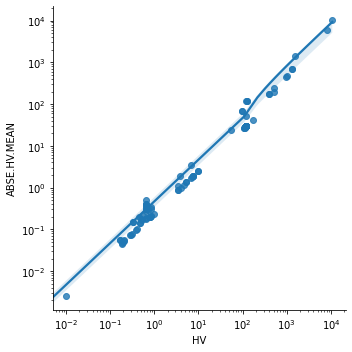

In [407]:
sns.lmplot(x="HV", y="ABSE.HV.MEAN", data=df)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/correlation-HV-ABSE.HV.MEAN.pdf")

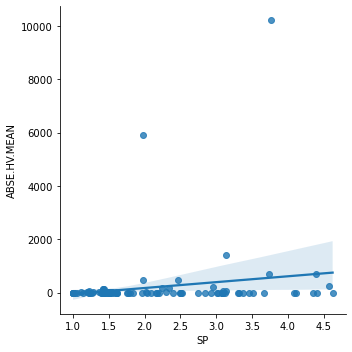

In [408]:
sns.lmplot(x="SP", y="ABSE.HV.MEAN", data=df)
plt.tight_layout()
plt.savefig("figures/correlation-SP-ABSE.HV.MEAN.pdf")

In [409]:
display(df.columns)
df[["ABSE.HV.MEAN","ABSE.CUM.HV.MEAN","ABSE.JF.CUM.HV.MEAN", "ABSE.JF.HV.MEAN"]]

Index(['instance', 'solver', 'run', 'seed', 'HV', 'HVN', 'SP', 'ABSE.HV.MEAN',
       'ABSE.HV.AUC.MEAN', 'ABSE.HV.AUC.B1', 'ABSE.CUM.HV.MEAN',
       'ABSE.CUM.HV.AUC.MEAN', 'ABSE.CUM.HV.AUC.B1', 'ABSE.JF.HV.MEAN',
       'ABSE.JF.HV.AUC.MEAN', 'ABSE.JF.HV.AUC.B1', 'ABSE.JF.CUM.HV.MEAN',
       'ABSE.JF.CUM.HV.AUC.MEAN', 'ABSE.JF.CUM.HV.AUC.B1', 'configuration'],
      dtype='object')

,ABSE.HV.MEAN,ABSE.CUM.HV.MEAN,ABSE.JF.CUM.HV.MEAN,ABSE.JF.HV.MEAN
49,0.000000,0.000000,414.062848,105.634951
78,455.888163,464.671710,610.186273,244.567323
93,475.795989,493.210290,591.754737,246.008662
116,5905.671150,5911.426964,7952.157326,1990.822498
55,0.000000,186.482767,684.289561,0.000000
...,...,...,...,...
50,30.165532,88.208744,59.878002,30.165532
27,30.250000,87.751792,59.693571,30.250000
34,29.378428,29.379544,0.000000,0.000000
128,29.378738,29.379153,0.000000,0.000000


## Anomalies

In the following cases the hypervolume is 0. Need to investigate why that is and why ABSE.HV.AUC.B1 does have an value. Suspicion: ABSE does use different reference points

In [411]:
df[df["HV"] <= df["ABSE.HV.MEAN"]]

,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
55,BiObjBBOB2,MOLE,0.0,2733.0,0.0,0.0,1.000510,0.0,1.472149e+06,0.000000,186.482767,1.141996e+07,0.000000,0.0,2.288574e+06,7.779380e+06,684.289561,2.507791e+07,6.427810e+07,NaN
126,BiObjBBOB4,omnioptimizer,0.0,2733.0,0.0,0.0,4.625419,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
16,BiObjBBOB5,MOLE,0.0,2733.0,0.0,0.0,1.033338,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.863782e+05,0.000000e+00,59.094478,5.119619e+06,0.000000e+00,NaN
137,DTLZ7,MOLE,0.0,2733.0,0.0,0.0,1.532556,0.0,5.470073e+03,16220.688343,0.151490,1.498690e+04,31717.310524,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
92,MMF1,omnioptimizer,0.0,2733.0,0.0,0.0,3.122416,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
15,MMF12,MOLE,0.0,2733.0,0.0,0.0,1.003952,0.0,2.948380e+02,115.540910,0.057204,5.265516e+03,2958.424830,0.0,3.122865e+02,1.148994e+03,0.054050,5.090169e+03,1.581149e+04,NaN
122,MMF1e,MOLE,0.0,2733.0,0.0,0.0,1.049176,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
69,MMF1e,omnioptimizer,0.0,2733.0,0.0,0.0,2.487374,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
26,MMF1z,omnioptimizer,0.0,2733.0,0.0,0.0,2.920048,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
84,MMF4,omnioptimizer,0.0,2733.0,0.0,0.0,3.094400,0.5,4.992336e+04,0.000000,0.500000,4.994121e+04,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN


## Decs and Obj visuals

In [412]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

import rpy2.robjects.pandas2ri
rpy2.robjects.pandas2ri.activate()

In [416]:
print("Parse visualisations")
def load_rdata(filepath):
    data = robjects.r['load'](filepath)

    objnames = ["dec.space", "dims", "step.sizes", "obj.space", "efficientSets", "decSpaceLabels",
                "basin_separated_eval"]

    result = {}

    for i, objname in enumerate(data):
        obj = robjects.r[objname]
        objdict = {}
        for j, field in enumerate(obj):
            if j < 6:
                o = np.array(obj[j])
            else:
                o = pd.DataFrame(obj[j])
            objdict[objnames[j]] = o
        result[objname] = objdict

    return result


df = None
for file in tqdm(os.listdir("visualisation")):
    if file[-6:] != ".Rdata":
        continue
    instance, solver = file[:-6].split("_")
    #     print(f"{instance} - {solver}")

    data = load_rdata(os.path.join("visualisation", file))
    #     tdf = data["abse"]["basin_separated_eval"]
    for absetype in ["abse", "absec"]:
        tdf = data[absetype]["basin_separated_eval"]
        tdf["type"] = absetype
        tdf["instance"] = instance
        tdf["solver"] = solver

        if df is None:
            df = tdf
        else:
            df = pd.concat([df, tdf], ignore_index=True)
print(df)

Parse visualisations


  0%|          | 0/139 [00:00<?, ?it/s]

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


       fun_calls  value_basin1  value_basin2  value_basin3  value_basin4  \
0            0.0      2.826018      3.585666           0.0           0.0   
1          100.0      2.704243      3.521333           0.0           0.0   
2          200.0      2.507636      3.532553           0.0           0.0   
3          300.0      2.497296      3.621937           0.0           0.0   
4          400.0      2.410496      3.657849           0.0           0.0   
...          ...           ...           ...           ...           ...   
69425    24600.0      0.000000      0.000000           0.0           0.0   
69426    24700.0      0.000000      0.000000           0.0           0.0   
69427    24800.0      0.000000      0.000000           0.0           0.0   
69428    24900.0      0.000000      0.000000           0.0           0.0   
69429    25000.0      0.000000      0.000000           0.0           0.0   

       mean_value  auc_hv_mean      auc_hv1   type    instance         solver  
0      

In [424]:
df = pd.read_csv("./abse_tables.csv")
df = df.sort_values("instance")
df.head(5)

,Unnamed: 0,fun_calls,value_basin1,value_basin2,value_basin3,value_basin4,mean_value,auc_hv_mean,auc_hv1,type,instance,solver
243934,243934,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
244590,244590,65700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
244591,244591,65800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
244592,244592,65900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE
244593,244593,66000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,BiObjBBOB1,MOLE


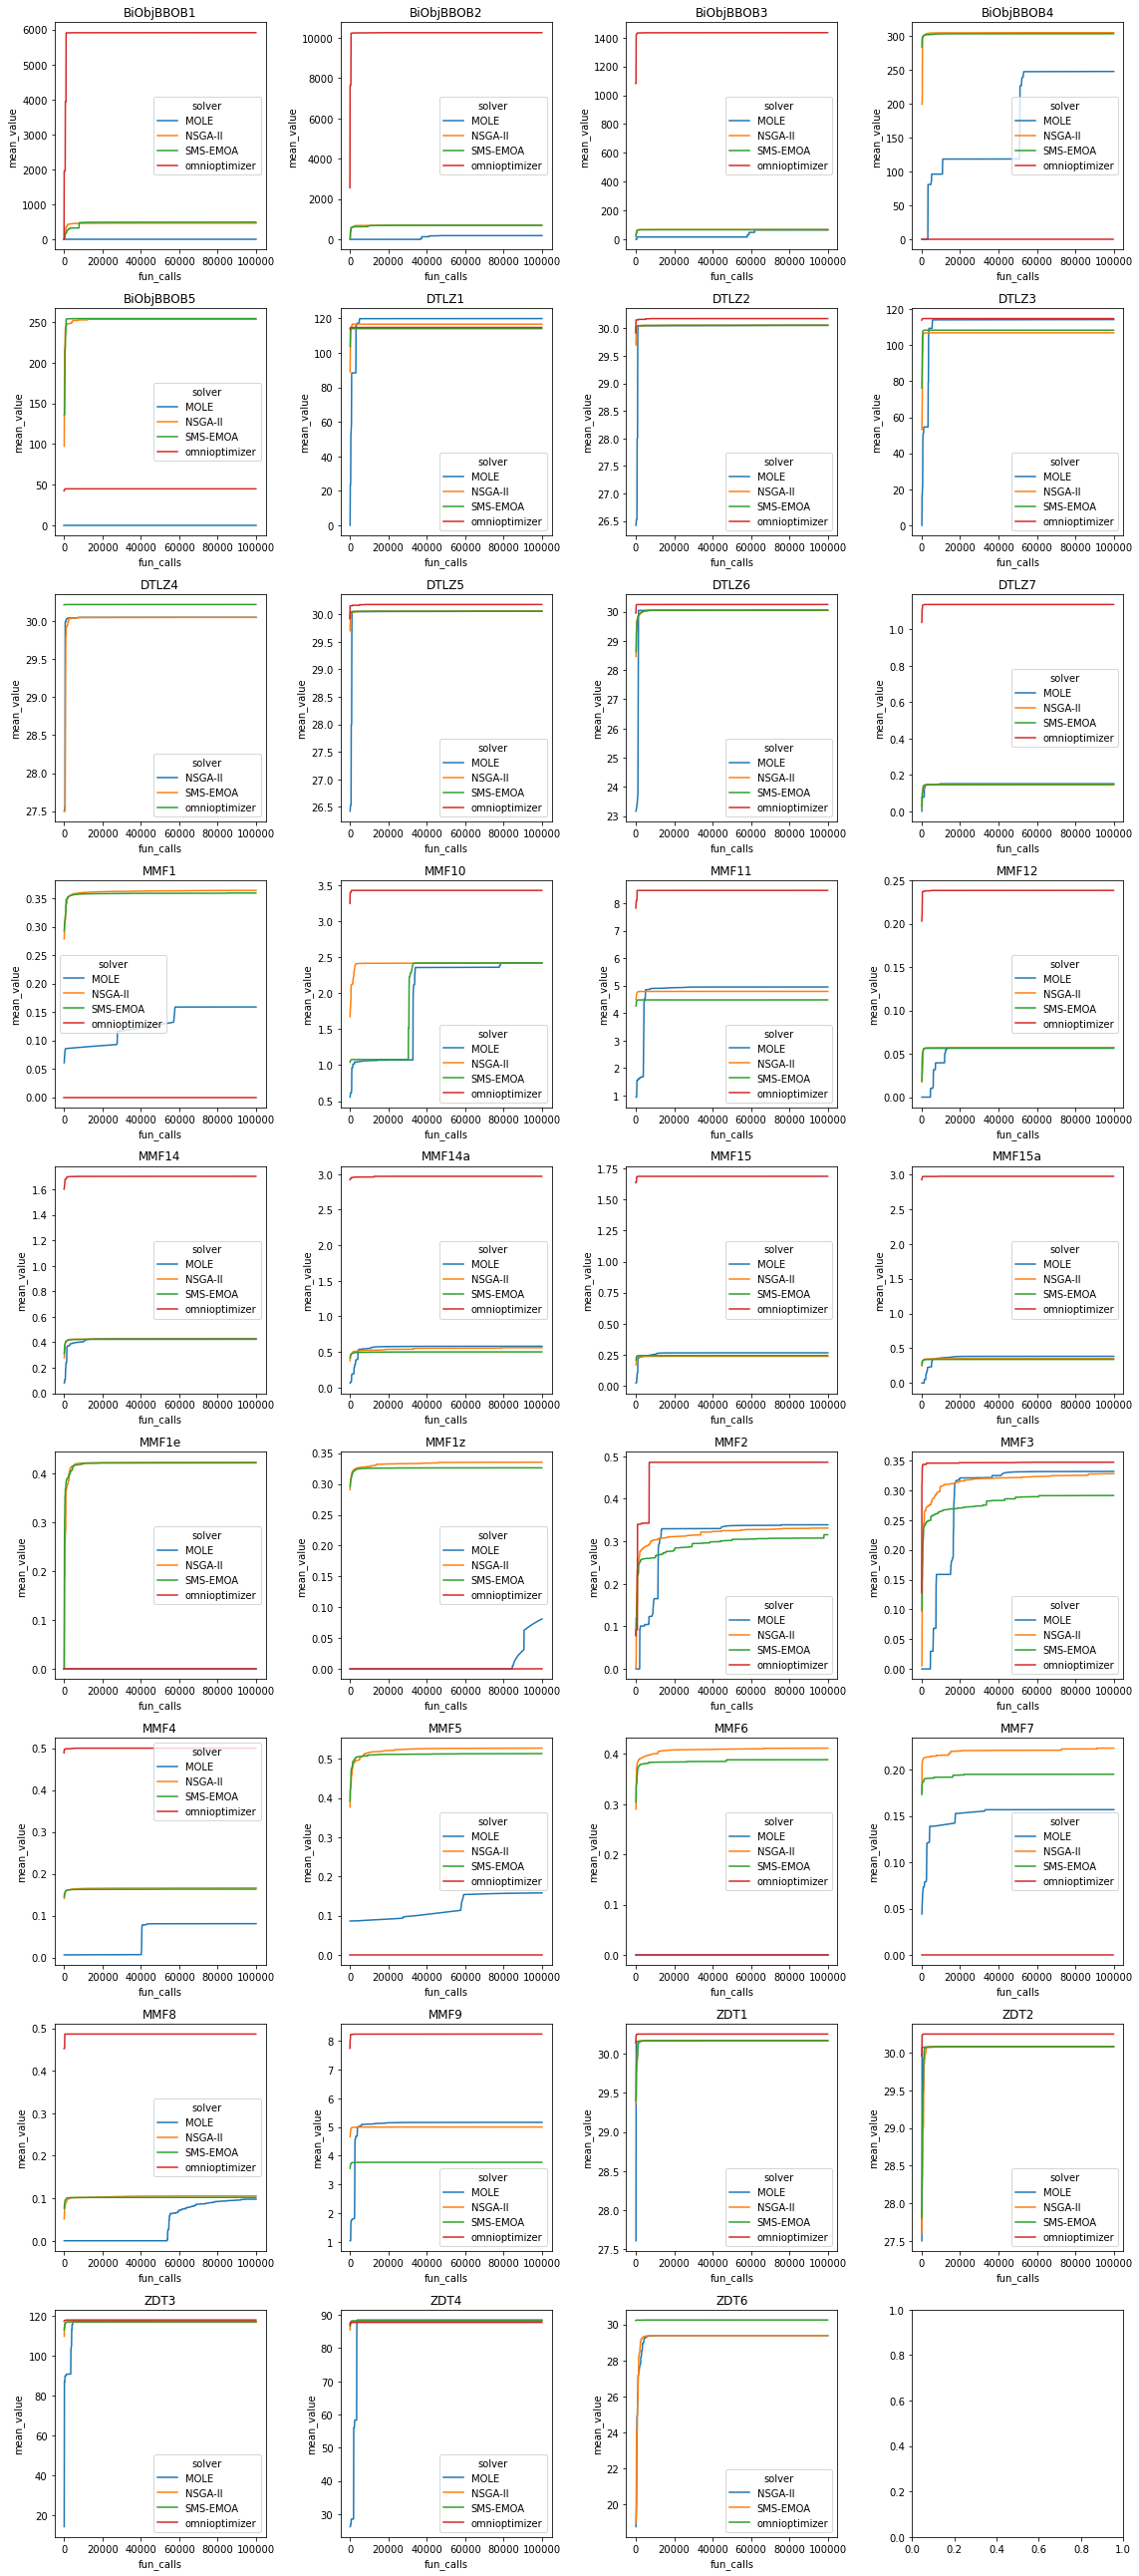

In [425]:
width = 4
height = int(np.ceil(len(df["instance"].unique())/width))

fix, axs = plt.subplots(height, width, figsize=(4*width, 4*height))

for figid, (instance, gdf) in enumerate(df[df["type"]=="absec"].sort_values("instance").groupby("instance")):
    gdf = gdf.sort_values("solver")
    #print(f"{figid}, {instance}")
    i = figid // width
    j = figid % width
    ax = axs[i][j]
    sns.lineplot(x="fun_calls", y="mean_value", hue="solver", ci=None, data=gdf, ax=ax)
    ax.set_title(instance)

fig.suptitle("ABSE cummulative mean per instance")
plt.tight_layout()
plt.savefig("figures/abse_mean_cum_per_instance.pdf")
plt.show()

In [426]:
df.groupby("solver")["fun_calls"].max()

solver
MOLE             100000.0
NSGA-II          100000.0
SMS-EMOA          99900.0
omnioptimizer     99900.0
Name: fun_calls, dtype: float64

In [427]:
result = load_rdata("visualisation/MMF10_NSGA-II.Rdata")
print(result["abse"]["decSpaceLabels"])

for label in np.unique(result["abse"]["decSpaceLabels"]):
    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
result["abse"].keys()

[-1.  1.  1. ...  2.  2.  2.]
-1.0 293
1.0 10169
2.0 79538


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


dict_keys(['dec.space', 'dims', 'step.sizes', 'obj.space', 'efficientSets', 'decSpaceLabels', 'basin_separated_eval'])

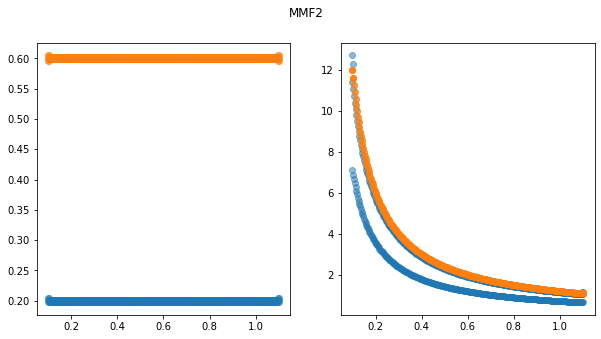

In [428]:
fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
for efficient_set in result["abse"]["efficientSets"]:
    dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
    decplt.scatter(*dec.T, alpha=0.5)
    obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
    objplt.scatter(*obj.T, alpha=0.5)
fig.suptitle("MMF2")
plt.show()

BiObjBBOB1
Efficient sets: 806


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


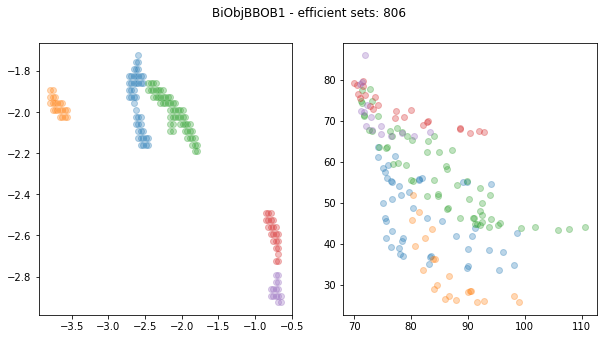

BiObjBBOB2
Efficient sets: 670


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


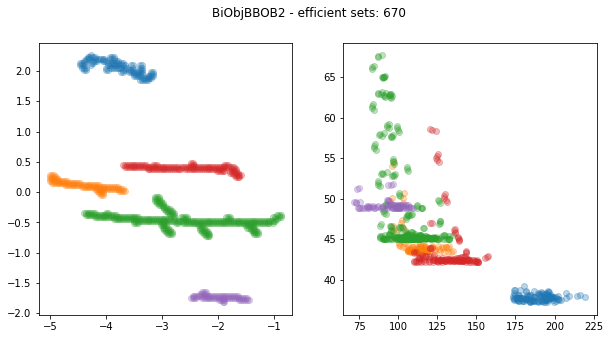

BiObjBBOB3
Efficient sets: 519


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


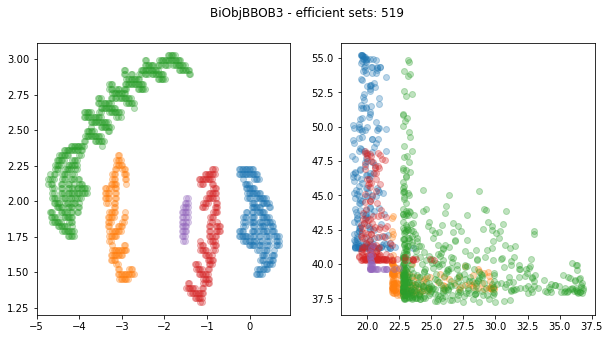

BiObjBBOB4
Efficient sets: 53


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


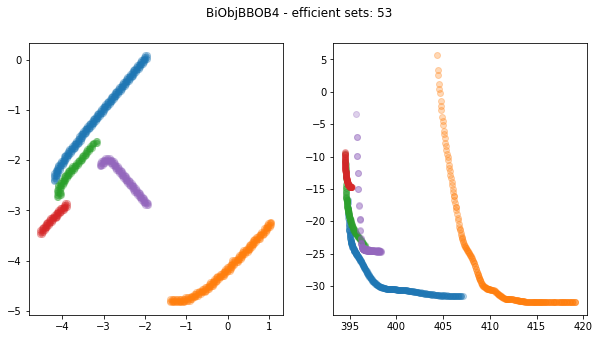

BiObjBBOB5
Efficient sets: 156


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


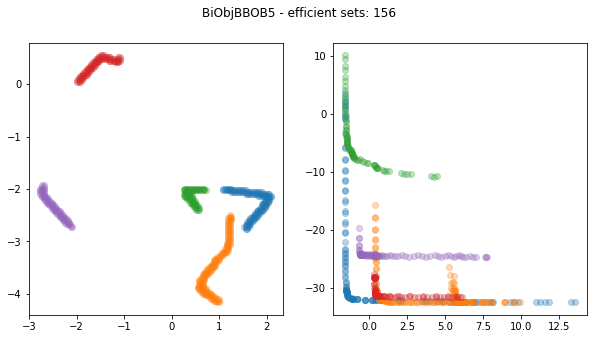

DTLZ1
Efficient sets: 11


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


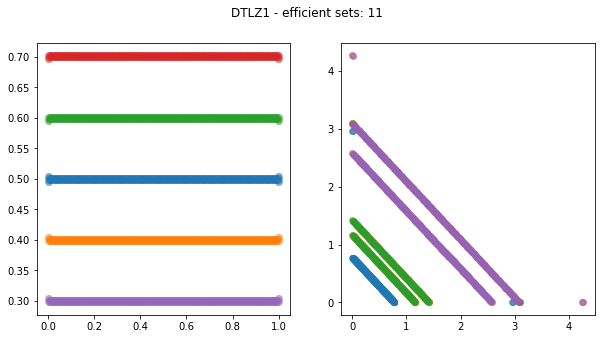

DTLZ2
Efficient sets: 1


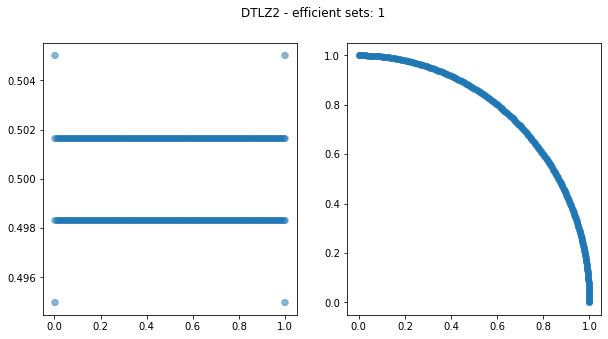

DTLZ3
Efficient sets: 11


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


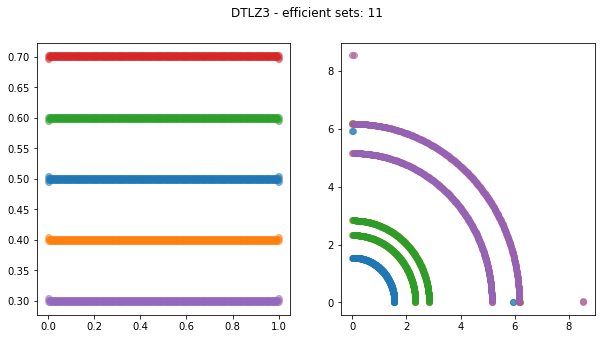

DTLZ4
Efficient sets: 1


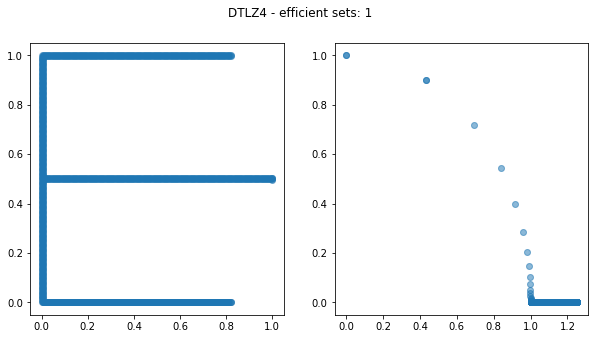

DTLZ5
Efficient sets: 1


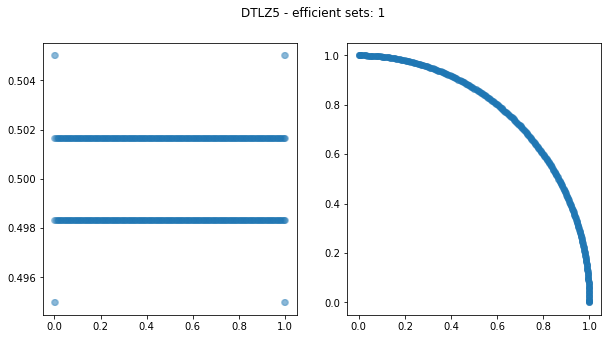

DTLZ6
Efficient sets: 1


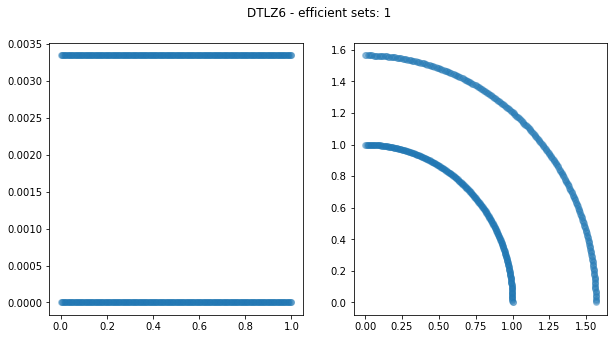

DTLZ7
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


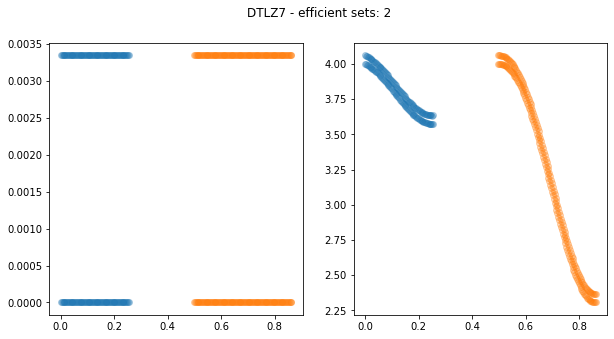

MMF1
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


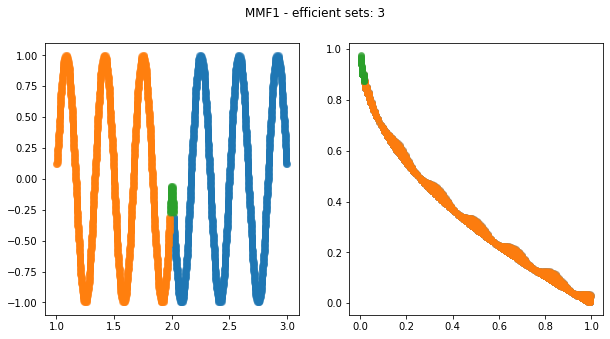

MMF10
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


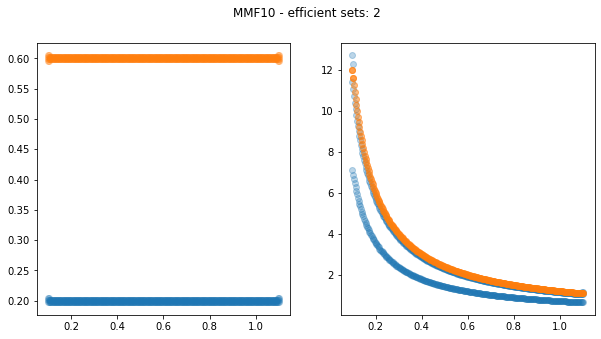

MMF11
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


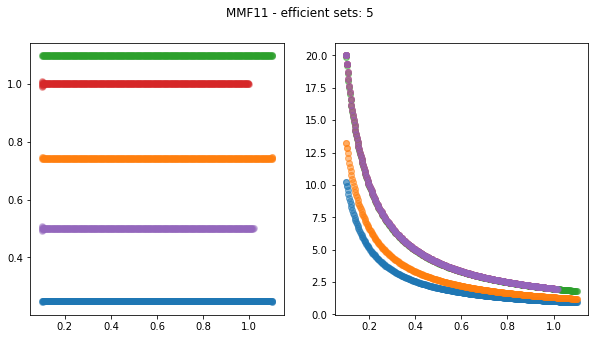

MMF12
Efficient sets: 31


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


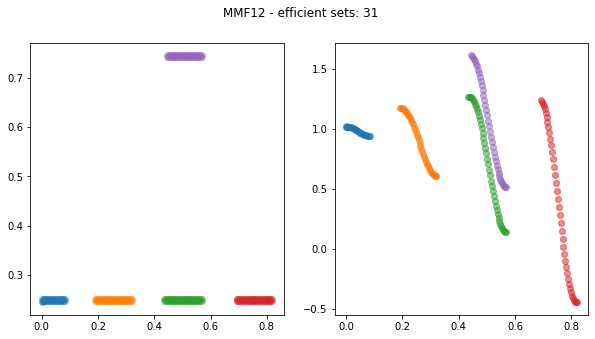

MMF14
Efficient sets: 2


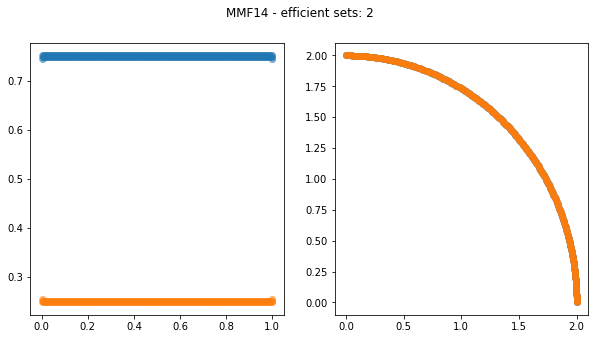

MMF14a
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


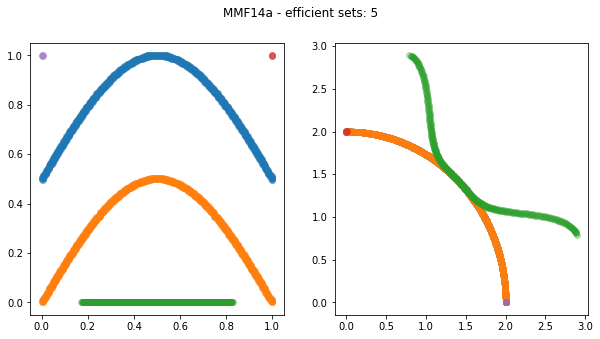

MMF15
Efficient sets: 2


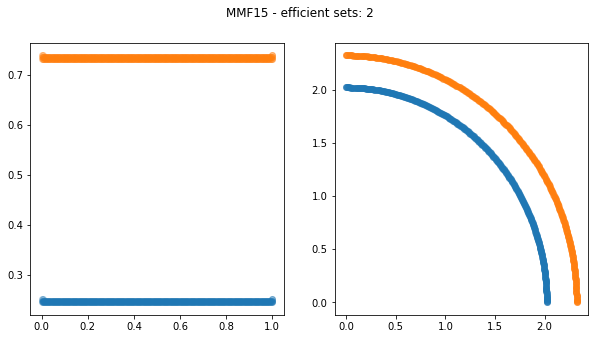

MMF15a
Efficient sets: 7


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


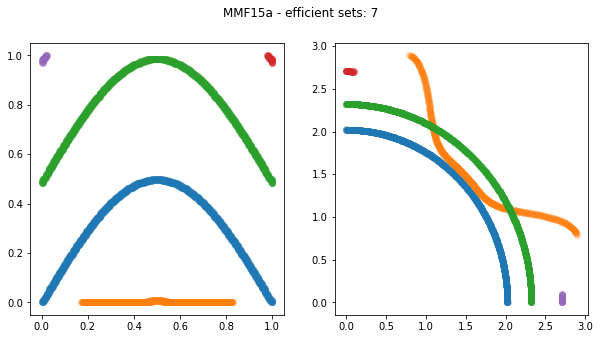

MMF1e
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


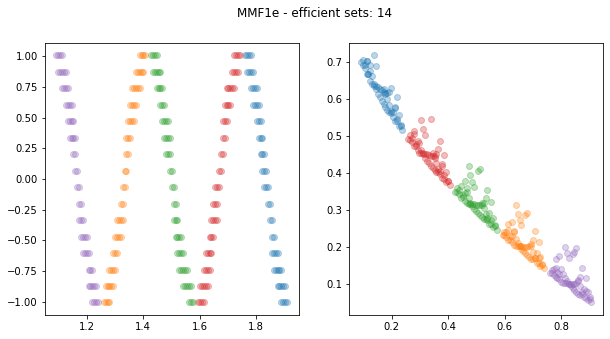

MMF1z
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


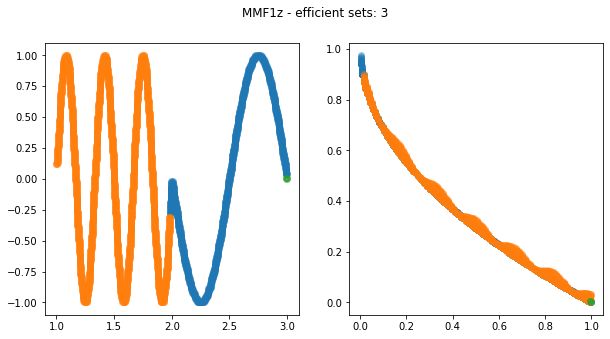

MMF2
Efficient sets: 34


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


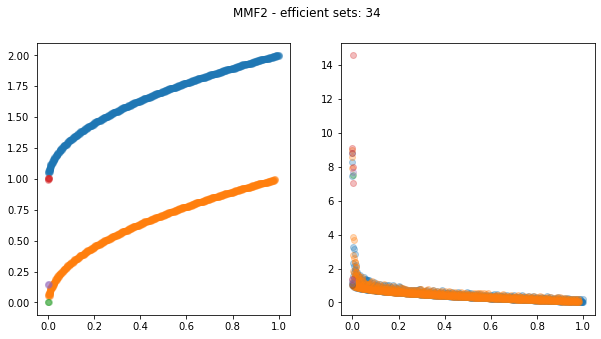

MMF3
Efficient sets: 36


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


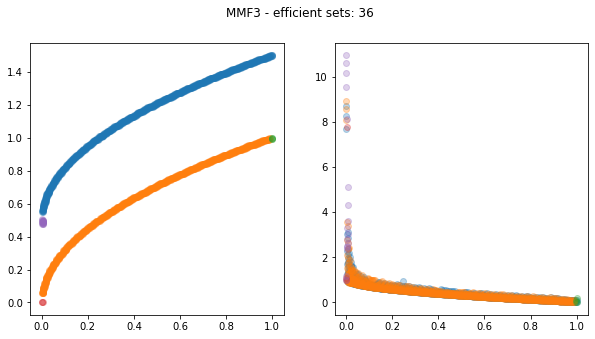

MMF4
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


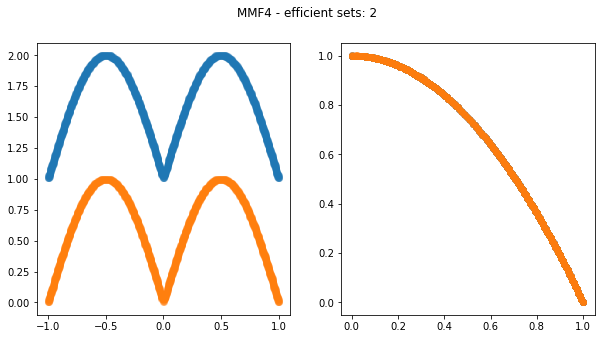

MMF5
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


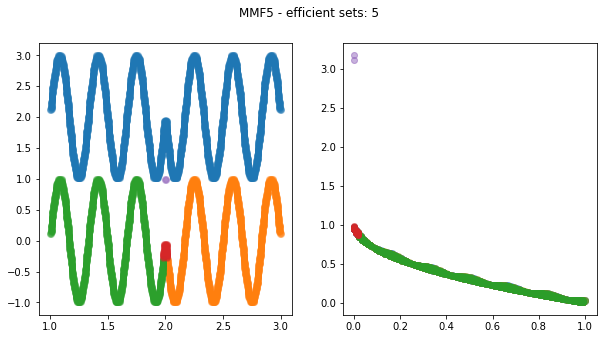

MMF6
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


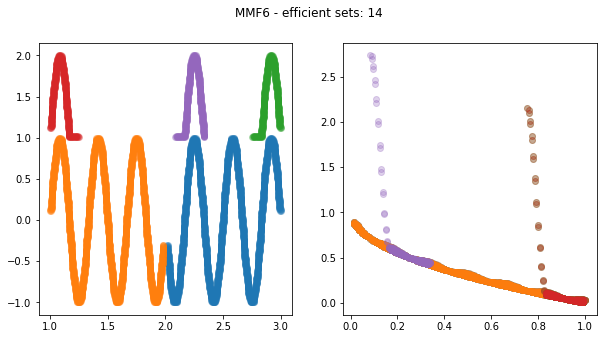

MMF7
Efficient sets: 9


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


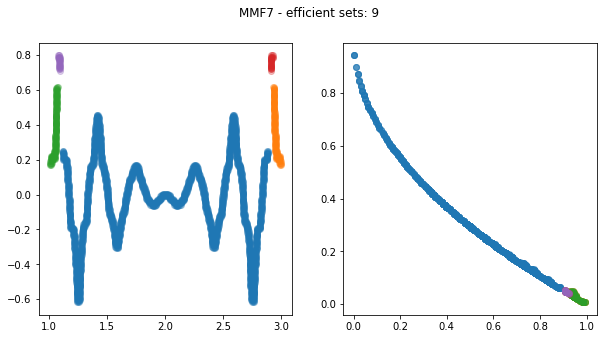

MMF8
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


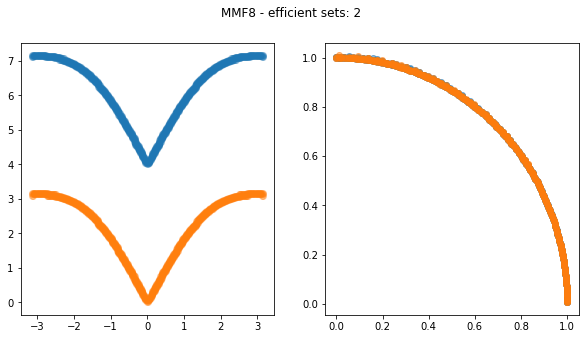

MMF9
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


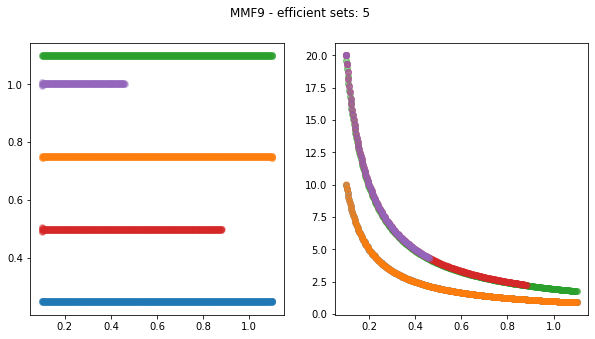

ZDT1
Efficient sets: 1


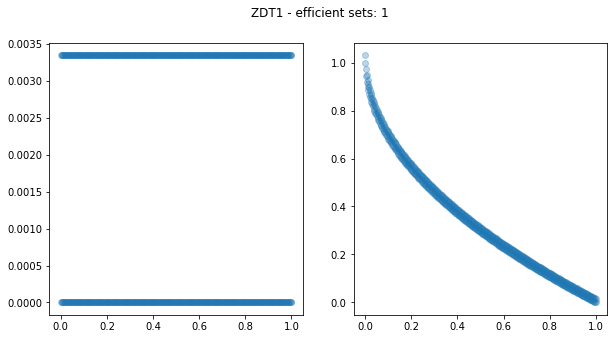

ZDT2
Efficient sets: 1


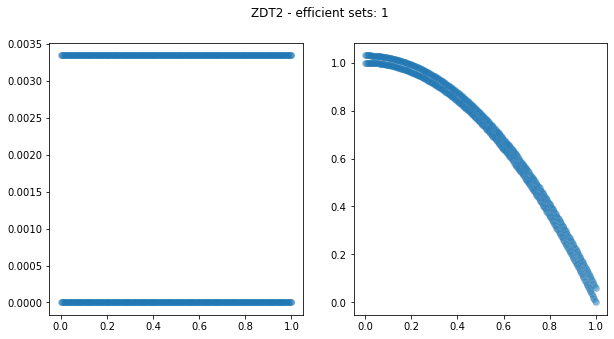

ZDT3
Efficient sets: 6


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


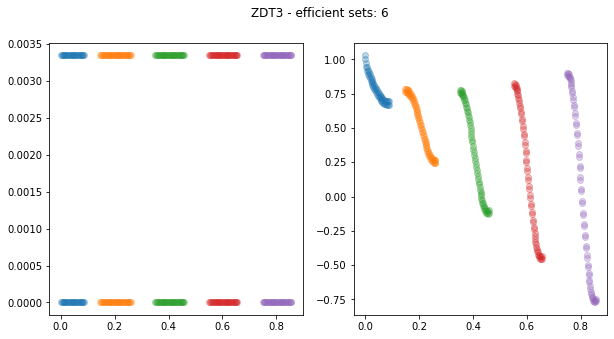

ZDT4
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3143346918.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


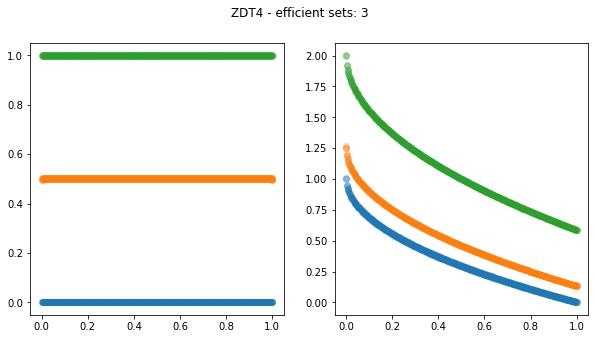

ZDT6
Efficient sets: 1


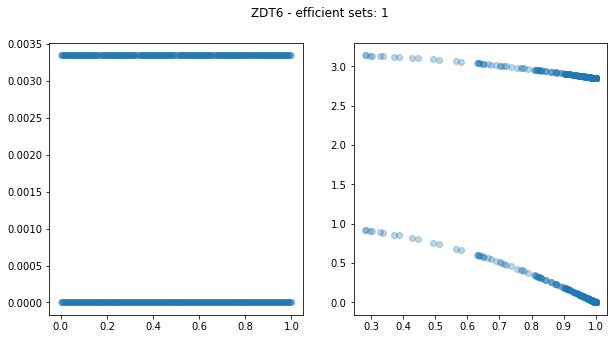

In [429]:
for instance in df["instance"].unique():
    print(instance)
    result = load_rdata(f"visualisation/{instance}_NSGA-II.Rdata")
    
    print("Efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    #for label in np.unique(result["abse"]["decSpaceLabels"]):
    #    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
    
    fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
    for efficient_set in result["abse"]["efficientSets"][:5]:
        dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
        decplt.scatter(*dec.T, alpha=0.3)
        obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
        objplt.scatter(*obj.T, alpha=0.3)
    fig.suptitle(instance + " - efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    plt.savefig(f"figures/efficientsets/{instance}.pdf")
    plt.show()